# IMDB
## Классификация отзывов на плохие и хорошие

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
from my_help_functions.plot import plot_loss, plot_metric

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# Обратное декодирование числовых данных датасета в текст с помощь словаря
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [4]:
# прямое кодирование списков в векторы нулей и единиц.


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# векторизация меток
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
# модель
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

2024-02-25 20:13:51.432720: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-02-25 20:13:51.432737: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-25 20:13:51.432741: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-25 20:13:51.432773: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-25 20:13:51.432791: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
# валидационная выборка
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
%time
# Обучение
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 2.86 µs
Epoch 1/20


2024-02-25 20:13:51.983397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 35ms/step - loss: 0.5122 - accuracy: 0.7614 - val_loss: 0.3788 - val_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2985 - accuracy: 0.9041 - val_loss: 0.3128 - val_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2242 - accuracy: 0.9259 - val_loss: 0.2770 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1749 - accuracy: 0.9433 - val_loss: 0.2746 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1441 - accuracy: 0.9538 - val_loss: 0.2954 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1198 - accuracy: 0.9632 - val_loss: 0.3110 - val_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0982 - accuracy: 0.9714 - val_loss: 0.3195 - val_accuracy: 0.8840
Epoch 8/20
30/30 [======

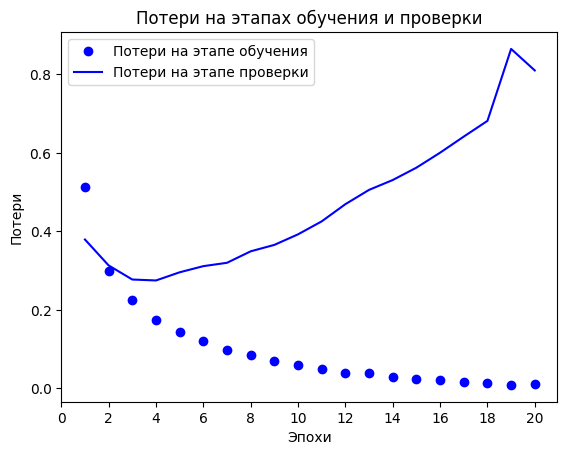

In [9]:
plot_loss(history)

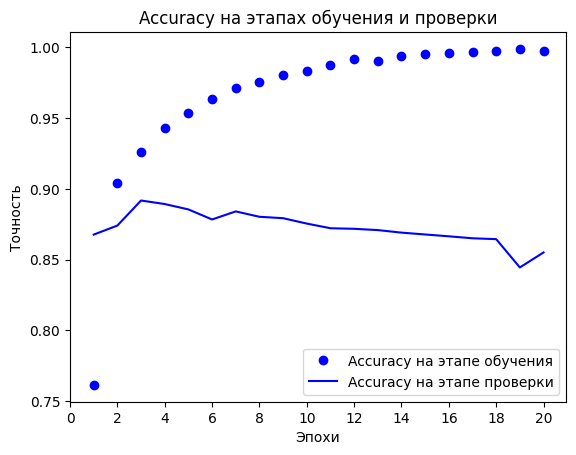

In [10]:
plot_metric(history, "accuracy", "Accuracy")

In [11]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=256)
results = model.evaluate(x_test, y_test)

Epoch 1/2
98/98 [==============================] - 1s 9ms/step - loss: 0.4016 - accuracy: 0.8408
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.2839 - accuracy: 0.8861


In [12]:
y_pred = model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


In [13]:
accuracy_score(y_test, (y_pred > 0.5) * 1.0)

0.88612